In [168]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
import numpy as np
import math
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 200)

In [169]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"

In [170]:
import git
git = git.Git("../../../sonarqube/") 

### Import all tag comparisons dataset

In [171]:
compare_tags = pd.read_csv(f"{csv_folder}/compare_tags_sha.csv", index_col=0)
compare_tags.head(2)

,from_tag,from_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_date
0,8.4.2.36762,2020-08-27 14:11:31,2de1f343e3dbd9e88007b42e475512677c04eb8a,a0d372f704998d38856c26e28662fd7de062f873,0,4,8.4.1.35646,2020-07-14 08:13:18
1,8.4.0.35506,2020-07-03 07:09:27,74b4533439f380827d68e8c01667eeaecad89fc7,a0d372f704998d38856c26e28662fd7de062f873,6,0,8.4.1.35646,2020-07-14 08:13:18


### Import tags

In [172]:
alltags = pd.read_csv(f"{csv_folder}/tags_updated.csv", index_col=0)
alltags.Date = pd.to_datetime(alltags.Date)
alltags.actual_release_date = pd.to_datetime(alltags.actual_release_date)
alltags["month"] = alltags.Date.dt.month
alltags["year"] = alltags.Date.dt.year
alltags.rename(columns={"Date":"release_date"}, inplace=True)
tags = alltags.tail(-1)
tags.head()

,actual_release_date,Tag,Sha,release_date,month,year,major_version,jira_version
1,NaT,4.5.7,e2afb0bff1b8be759789d2c1bc9348de6f519f83,2016-04-08 13:44:39,4,2016,4,4.5.7
2,2015-04-23,5.1,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,2015-04-02 08:09:45,4,2015,5,5.1
3,NaT,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1
4,NaT,5.1.2,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,2015-07-27 08:03:21,7,2015,5,5.1.2
5,2015-11-26,5.2,f045be98be3ba032b6b19d71574038eeeb91803b,2015-11-02 08:56:19,11,2015,5,5.2


### Filter the ones after the project started using TravisCI

In [173]:
tags = tags[tags.release_date > "2015-03-10"]

In [174]:
tags.Tag.nunique()

56

### Import tag comparison pairs

In [175]:
tags_comparison = pd.read_csv(f"{csv_folder}/tags_comparison_final_updated.csv", index_col=0)
tags_comparison.from_commit_date = pd.to_datetime(tags_comparison.from_commit_date)
tags_comparison.to_commit_date = pd.to_datetime(tags_comparison.to_commit_date)
tags_comparison.from_author_date = pd.to_datetime(tags_comparison.from_author_date)
tags_comparison.to_author_date = pd.to_datetime(tags_comparison.to_author_date)
tags_comparison.tail(20)

,from_tag,from_author_date,from_sha,to_sha,ahead_by,behind_by,to_tag,to_author_date,ahead_behind_sum,diff_author_dates,diff_author_days,from_commit_date,to_commit_date,diff_commit_dates,diff_commit_days
2319,7.1,2018-03-23 20:20:52,ecdde3879059a41f229782061bdad49677dd63f8,d7828ea4d821aaceedd431004c83a196cea8b38a,500,0,7.2,2018-06-13 20:20:50,500,81 days 23:59:58,81.999977,2018-03-23 20:20:52,2018-06-13 20:20:50,81 days 23:59:58,81.999977
2320,7.2,2018-06-13 20:20:50,d7828ea4d821aaceedd431004c83a196cea8b38a,87c1e3d93bf8a583932c11d4e1b740e91f80ffa0,228,0,7.3,2018-07-20 20:21:18,228,37 days 00:00:28,37.000324,2018-06-13 20:20:50,2018-07-20 20:21:18,37 days 00:00:28,37.000324
2321,7.3,2018-07-20 20:21:18,87c1e3d93bf8a583932c11d4e1b740e91f80ffa0,86937350807da2beb38dcd4216eafea0009fb99f,101,0,7.4,2018-08-03 20:21:25,101,14 days 00:00:07,14.000081,2018-07-20 20:21:18,2018-08-03 20:21:25,14 days 00:00:07,14.000081
2322,7.4,2018-08-03 20:21:25,86937350807da2beb38dcd4216eafea0009fb99f,cb851ba202973bd468e070572c1e3b0b0437d2f4,657,0,7.5,2018-12-18 09:56:40,657,136 days 13:35:15,136.566146,2018-08-03 20:21:25,2018-12-20 11:41:48,138 days 15:20:23,138.639155
249,7.5,2018-12-18 09:56:40,cb851ba202973bd468e070572c1e3b0b0437d2f4,c2edd480f08c8a692757df5ce6c89cddb566b666,243,0,7.6,2019-01-21 15:04:13,243,34 days 05:07:33,34.213576,2018-12-20 11:41:48,2019-01-21 20:21:01,32 days 08:39:13,32.360567
230,7.6,2019-01-21 15:04:13,c2edd480f08c8a692757df5ce6c89cddb566b666,69bc562d207053ef21afd12c8bc9c5217b50227a,236,0,7.7,2019-03-19 16:29:12,236,57 days 01:24:59,57.059016,2019-01-21 20:21:01,2019-03-20 16:29:54,57 days 20:08:53,57.839502
211,7.7,2019-03-19 16:29:12,69bc562d207053ef21afd12c8bc9c5217b50227a,870ae4efbf5dcdbe59295eb5827b55a6a74c7b89,509,0,7.8,2019-06-18 09:08:04,509,90 days 16:38:52,90.693657,2019-03-20 16:29:54,2019-06-18 20:21:07,90 days 03:51:13,90.160567
192,7.8,2019-06-18 09:08:04,870ae4efbf5dcdbe59295eb5827b55a6a74c7b89,6502ec4ffee7e5a57498baaf330b80eb490d01c2,141,0,7.9,2019-07-01 07:56:26,141,12 days 22:48:22,12.950255,2019-06-18 20:21:07,2019-10-17 15:24:45,120 days 19:03:38,120.794190
173,7.9,2019-07-01 07:56:26,6502ec4ffee7e5a57498baaf330b80eb490d01c2,6818fad17ba67e97d395a8488d5412e00892d5e1,17,0,7.9.1,2019-07-10 12:20:33,17,9 days 04:24:07,9.183414,2019-10-17 15:24:45,2019-10-17 15:24:48,0 days 00:00:03,0.000035
113,7.9,2019-07-01 07:56:26,6502ec4ffee7e5a57498baaf330b80eb490d01c2,87ca68d63f4afd37d74b2f454430dfde9e862c6a,415,1,8.0,2019-10-15 08:15:12,416,106 days 00:18:46,106.013032,2019-10-17 15:24:45,2019-10-15 11:52:16,-3 days +20:27:31,-2.147558


### Import issues

In [176]:
issues = pd.read_csv(f"{csv_folder}/issues.csv", index_col=0)
for date_field in ["created", "duedate", "lastViewed", "resolutiondate", "updated"]:
    issues[date_field] = pd.to_datetime(issues[date_field], errors="coerce")
issues = issues[issues.created > '2015-03-17 15:04:32+0000']
issues = issues[~(issues.edition == "Enterprise")]
issues.head()

/Library/Python/3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,9,12,13,17,19,22,41,42,43,60,61,82,84,89) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,issue_key,issue_id,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes
0,SONAR-13913,97898,Task,P3-Medium,0|i0dkhb:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5060633888>,2020-09-29 08:54:53+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],NaN,2020-09-29 08:54:53+00:00,Open,"[<JIRA Component: name='Database', id='11077'>]",NaN,NaN,NaN,NaN,NaN,- Remove org.sonar.server.platform.BackendClea...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Remove table clean up used in Integration Tests,Julien Lancelot,[],NaN,NaN,Julien Lancelot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,NaN,NaN,julien.lancelot,julien.lancelot,julien.lancelot,julien.lancelot,1,Open,NaN,NaN,0
1,SONAR-13912,97868,Task,P3-Medium,0|i0dkav:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061570768>,2020-09-28 10:14:16+00:00,NaN,NaN,Major,Community,NaN,NaN,NaN,['trello:5f71b7467b498d57987bfe0a'],None,NaN,NaN,NaN,NaN,NaN,[],[<JIRA IssueLink: id='53803'>],Malena Ebert,2020-09-28 10:18:24+00:00,Open,[],NaN,NaN,NaN,NaN,NaN,The goal of this task is to detect vulnerabili...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Add OWASP Dependency Check task to Cirrus CI,Malena Ebert,[],NaN,NaN,Malena Ebert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,0,3,Task,3,Major,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,malena.ebert,1,Open,NaN,NaN,0
2,SONAR-13910,97864,Improvement,P3-Medium,0|i0dka7:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5061573984>,2020-09-28 09:56:03+00:00,NaN,NaN,Major,Developer,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,[],[],Julien Lancelot,2020-09-28 19:33:18+00:00,In Review,[],NaN,NaN,NaN,NaN,NaN,The changes are:\r\n * faster analysis for pro...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,C/C++/Objective-C analysis updates,Evgeny Mandrikov,[],NaN,NaN,Evgeny Mandrikov,NaN,NaN,Na

In [177]:
issues.shape

(5594, 108)

### Import issue versions

In [178]:
versions = pd.read_csv(f"{csv_folder}/issues_versions.csv", index_col=0)
versions.head()

,issue_id,version_name,version_id
0,97777,8.4.2,16404
1,97773,8.4.2,16404
2,97525,8.4.2,16404
3,97521,8.4,15833
4,97347,8.4.2,16404


**Uniform versions**

In [179]:
map_versions = {"8.5.0.37579": "8.5",
               "8.4.0.35506": "8.4",
               "8.3.0.34182": "8.3",
               "8.3.1.34397": "8.3.1",
               "8.2.0.32929": "8.2",
               "8.1.0.31237": "8.1",
               "8.4.2.36762": "8.4.2",
               "8.4.1.35646": "8.4.1",
                 '6.3.0.18401':"6.3",
                 '6.3.0.18587':"6.3",
                 '6.3.0.18800':"6.3"}

In [180]:
tags

,actual_release_date,Tag,Sha,release_date,month,year,major_version,jira_version
1,NaT,4.5.7,e2afb0bff1b8be759789d2c1bc9348de6f519f83,2016-04-08 13:44:39,4,2016,4,4.5.7
2,2015-04-23,5.1,4aa9af3a6a4362b61db365fba32eb0a55d411e7a,2015-04-02 08:09:45,4,2015,5,5.1
3,NaT,5.1.1,0a231d24c0f1e7ce1d200274b8e9bbe00f9f49fb,2015-06-02 08:34:06,6,2015,5,5.1.1
4,NaT,5.1.2,2a52a7106b2bfbd659c591c2d6fc09ad0ab2db5c,2015-07-27 08:03:21,7,2015,5,5.1.2
5,2015-11-26,5.2,f045be98be3ba032b6b19d71574038eeeb91803b,2015-11-02 08:56:19,11,2015,5,5.2
6,2016-01-28,5.3,8db783e62b266eeb0d0b10dc050a7ca50e96c5d1,2016-01-08 10:09:15,1,2016,5,5.3
7,2016-04-01,5.4,7b02df9be3cd9448699b5857586e1c6e2b28c007,2016-03-08 15:48:19,3,2016,5,5.4
8,2016-05-19,5.5,5773a4aab0ef6c0de79d3038e82f8a051049d6d0,2016-05-02 14:09:29,5,2016,5,5.5
9,2016-06-08,5.6,074f3d1169f9688d15af4aff67e7e672cbeed782,2016-06-01 11:59:09,6,2016,5,5.6
10,NaT,5.6.1,4f37a3f3b40da4bba953d1ed9a2b0d114869a8ad,2016-07-25 08:13:12,7,2016,5,5.6.1


In [181]:
#tags["jira_version"] = tags.Tag.apply(lambda tag: map_versions[tag] if tag in map_versions else tag)

### How many issues before and after the release?

In [182]:
tags["release_date"] = tags.apply(lambda row: row.Date if pd.isnull(row.release_date) else row.release_date,axis=1)

In [183]:
focus_columns = ["issue_id","version_name","Tag","version_id","issue_key","issuetype","created", "actual_release_date", "release_date"]

In [184]:
v_merged = versions.merge(issues, on="issue_id")

In [185]:
vm_merged = v_merged.merge(tags, left_on="version_name", right_on="jira_version")

In [186]:
vm_merged.created = vm_merged.created.dt.tz_localize(None)
vm_merged

,issue_id,version_name,version_id,issue_key,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes,actual_release_date,Tag,Sha,release_date,month,year,major_version,jira_version
0,97777,8.4.2,16404,SONAR-13902,Improvement,P3-Medium,0|i0djrj:,No root cause identified,NaN,SONAR,Not captured yet,NaN,[],Not assessed yet,Not captured yet,NaN,NaN,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,NaT,-1,NaT,<JIRA Watchers at 5060450576>,2020-09-23 10:22:51,NaN,NaN,Major,Developer,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,"[<JIRA Version: name='8.4.2', id='16404'>]",[],NaN,2020-09-23 10:24:59+00:00,Open,"[<JIRA Component: name='Branch & PR', id='1109...",NaN,NaN,NaN,NaN,NaN,SonarQube PR decoration on Bitbucket Server so...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Improve BitBucket Server error handling,Pierre Guillot,[],NaN,NaN,Pierre Guillot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],NaT,1,4,Improvement,3,Major,NaN,NaN,pierre.guillot,pierre.guillot,pierre.guillot,pierre.guillot,1,Open,NaN,NaN,1,NaT,8.4.2.36762,2de1f343e3dbd9e88007b42e475512677c04eb8a,2020-08-27 14:11:31,8,2020,8,8.4.2
1,97773,8.4.2,16404,SONAR-13900,Bug,P3-Medium,0|i0djqn:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-09-28 11:15:55+00:00,-1,NaT,<JIRA Watchers at 5060412080>,2020-09-23 09:30:41,NaN,NaN,Major,Developer,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,"[<JIRA Version: name='8.4.2', id='16404'>]",[],Wouter Admiraal,2020-09-28 11:15:55+00:00,Closed,"[<JIRA Component: name='Branch & PR', id='1109...",NaN,NaN,NaN,NaN,NaN,"reproducer:\r\n * On BBS create 27 projects, w...",NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,BitBucketServer Onboarding: web ui search resu...,Pierre Guillot,[],NaN,NaN,Pierre Guillot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NaN,NaN,NaN,NaN,,NaN,[],2020-10-02 00:00:00+00:00,0,1,Bug,3,Major,wouter.admiraal,wouter.admiraal,pierre.guillot,pierre.guillot,pierre.guillot,pierre.guillot,6,Closed,1.0,Fixed,0,NaT,8.4.2.36762,2de1f343e3dbd9e88007b42e475512677c04eb8a,2020-08-27 14:11:31,8,2020,8,8.4.2
2,97525,8.4.2,16404,SONAR-13875,New Feature,P3-Medium,0|i0di8v:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.5', id='16342'>]",Not assessed yet,Not captured

In [187]:
(vm_merged.created > vm_merged.release_date).value_counts(normalize=True)

True     0.836825
False    0.163175
dtype: float64

<AxesSubplot:ylabel='count'>

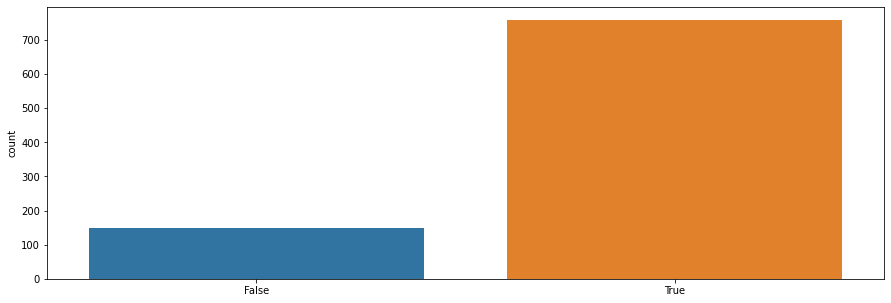

In [188]:
sns.countplot(x=vm_merged.created > vm_merged.release_date)

In [189]:
(vm_merged.created > vm_merged.release_date).value_counts(normalize=True)

True     0.836825
False    0.163175
dtype: float64

**Post release issues**

In [190]:
post_release = vm_merged[vm_merged.created > vm_merged.release_date]

In [191]:
post_release["diff_release_created_dates"] = post_release.created - post_release.release_date
post_release["diff_release_created_days"] = post_release.diff_release_created_dates / np.timedelta64(1, "D")

<ipython-input-191-527cbe80a733>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_release["diff_release_created_dates"] = post_release.created - post_release.release_date
<ipython-input-191-527cbe80a733>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_release["diff_release_created_days"] = post_release.diff_release_created_dates / np.timedelta64(1, "D")


<AxesSubplot:xlabel='diff_release_created_days'>

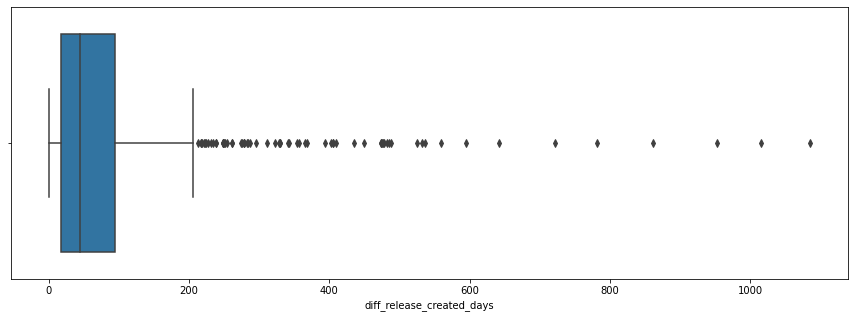

In [192]:
sns.boxplot(x=post_release.diff_release_created_days)

In [193]:
post_release.issuetype.value_counts(normalize=True)

Bug              0.888011
Improvement      0.097497
Task             0.007905
Documentation    0.005270
New Feature      0.001318
Name: issuetype, dtype: float64

**Investigate outliers**

In [194]:
post_release[post_release.diff_release_created_days >800][focus_columns]

,issue_id,version_name,Tag,version_id,issue_key,issuetype,created,actual_release_date,release_date
156,86937,6.0,6.0,13026,SONAR-12341,Bug,2019-07-24 09:50:48,2016-08-16,2016-08-03 09:19:42
194,86937,6.1,6.1,13287,SONAR-12341,Bug,2019-07-24 09:50:48,2016-10-25,2016-10-11 07:02:29
211,86937,6.2,6.2,13327,SONAR-12341,Bug,2019-07-24 09:50:48,2017-01-05,2016-12-13 15:05:23
245,86937,6.3,6.3,13470,SONAR-12341,Bug,2019-07-24 09:50:48,2017-04-12,2017-03-14 09:12:39


**Pre release issues**

In [195]:
pre_release = vm_merged[vm_merged.created < vm_merged.release_date]

In [196]:
pre_release["diff_release_created_dates"] = pre_release.release_date - pre_release.created
pre_release["diff_release_created_days"] = pre_release.diff_release_created_dates / np.timedelta64(1, "D")

<ipython-input-196-96d2cd9173a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_release["diff_release_created_dates"] = pre_release.release_date - pre_release.created
<ipython-input-196-96d2cd9173a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_release["diff_release_created_days"] = pre_release.diff_release_created_dates / np.timedelta64(1, "D")


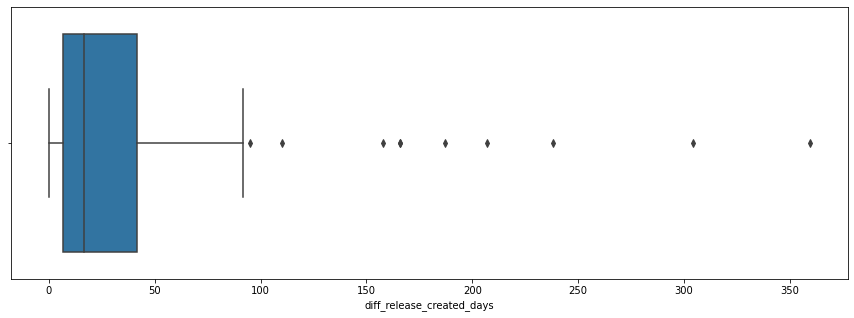

In [197]:
plt.figure()
sns_plot = sns.boxplot(x=pre_release.diff_release_created_days)
plt.savefig("output.png", transparent=True, bbox_inches='tight', pad_inches=0.2)

In [198]:
pre_release[pre_release.diff_release_created_days>200][focus_columns]

,issue_id,version_name,Tag,version_id,issue_key,issuetype,created,actual_release_date,release_date
14,90155,8.4,8.4.0.35506,15833,SONAR-12692,Bug,2019-11-08 08:39:33,2020-07-07,2020-07-03 07:09:27
582,61798,6.7.3,6.7.3,14264,SONAR-9384,Bug,2017-06-06 14:45:35,NaT,2018-04-06 14:12:21
638,39290,5.6,5.6,12869,SONAR-6622,Improvement,2015-06-08 05:18:41,2016-06-08,2016-06-01 11:59:09
769,29791,5.2,5.2,11629,SONAR-6407,Improvement,2015-04-09 08:50:02,2015-11-26,2015-11-02 08:56:19


In [199]:
pre_release.issuetype.value_counts(normalize=True)

Bug              0.682432
Improvement      0.250000
Task             0.033784
Sub-task         0.027027
Documentation    0.006757
Name: issuetype, dtype: float64

**Pre release and after tagging issues**

In [201]:
pre_release_after_tagging = vm_merged[(vm_merged.created > vm_merged.release_date) & (vm_merged.created < vm_merged.actual_release_date)]

In [202]:
pre_release_after_tagging

,issue_id,version_name,version_id,issue_key,issuetype,customfield_12130,customfield_11041,customfield_12132,customfield_12131,project,customfield_12134,customfield_12530,fixVersions,customfield_12133,customfield_12136,customfield_12532,resolution,customfield_10431,customfield_12135,customfield_12531,customfield_12138,customfield_10432,customfield_12534,customfield_12137,customfield_10433,customfield_12533,customfield_11832,customfield_11831,customfield_11833,resolutiondate,workratio,lastViewed,watches,created,customfield_11032,customfield_11033,priority,edition,customfield_11233,customfield_11036,customfield_11830,labels,customfield_11631,customfield_11038,customfield_10930,customfield_11347,customfield_10931,customfield_10932,versions,issuelinks,assignee,updated,status,components,customfield_12031,customfield_11140,customfield_12030,customfield_12033,customfield_11141,description,customfield_12032,customfield_12034,customfield_12430,customfield_11344,customfield_11343,customfield_10530,customfield_11345,customfield_10730,customfield_11337,customfield_11930,customfield_11139,customfield_11338,summary,creator,subtasks,customfield_11130,customfield_11131,reporter,customfield_11132,customfield_11133,customfield_10243,customfield_11335,customfield_11334,customfield_11730,customfield_10434,customfield_12536,customfield_12535,customfield_12139,environment,customfield_12538,customfield_10437,customfield_12537,customfield_10438,duedate,votes,issuetype_id,issuetype_name,priority_id,priority_name,assignee_key,assignee_name,reporter_key,reporter_name,creator_key,creator_name,status_id,status_name,resolution_id,resolution_name,votes_votes,actual_release_date,Tag,Sha,release_date,month,year,major_version,jira_version
10,95773,8.4,15833,SONAR-13590,Bug,P3-Medium,0|i0d7m7:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.4.1', id='16358'>, <JI...",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-07-08 14:50:23+00:00,-1,NaT,<JIRA Watchers at 5070190240>,2020-07-06 11:11:13,NaN,NaN,Blocker,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,"[<JIRA Version: name='8.4', id='15833'>]",[],Pierre Guillot,2020-07-22 13:16:26+00:00,Closed,"[<JIRA Component: name='ElasticSearch', id='11...",NaN,NaN,NaN,NaN,NaN,This issue was raised by the [community|https:...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,SonarQube is not starting when in need of issu...,Pierre Guillot,[],NaN,NaN,Pierre Guillot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,[],2020-07-14 00:00:00+00:00,1,1,Bug,1,Blocker,pierre.guillot,pierre.guillot,pierre.guillot,pierre.guillot,pierre.guillot,pierre.guillot,6,Closed,1.0,Fixed,1,2020-07-07,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,7,2020,8,8.4
11,95772,8.4,15833,SONAR-13589,Bug,P3-Medium,0|i0d7lz:,No root cause identified,NaN,SONAR,Not captured yet,NaN,"[<JIRA Version: name='8.4.1', id='16358'>, <JI...",Not assessed yet,Not captured yet,NaN,Fixed,NaN,No action plan,NaN,Not captured yet,NaN,NaN,Not captured yet,NaN,NaN,NaN,NaN,NaN,2020-07-09 09:19:03+00:00,-1,NaT,<JIRA Watchers at 5070191248>,2020-07-06 11:02:37,NaN,NaN,Major,Community,NaN,NaN,NaN,[],None,NaN,NaN,NaN,NaN,NaN,"[<JIRA Version: name='8.4', id='15833'>]",[],Jeremy Davis,2020-07-15 14:15:53+00:00,Closed,"[<JIRA Component: name='Web', id='11366'>]",NaN,NaN,NaN,NaN,NaN,This is linked to SONAR-13479. We're querying ...,NaN,SonarQube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{},NaN,NaN,Creation menu tries to connect to Developer Ed...,Wouter Admiraal,[],NaN,NaN,Wouter Admiraal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,[],2020-07-13 00:00:00+00:00,0,1,Bug,3,Major,jeremy.davis,jeremy.davis,wouter.admiraal,wouter.admiraal,wouter.admiraal,wouter.admiraal,6,Closed,1.0,Fixed,0,2020-07-07,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,7,2020,8,8.4
108,89425,8.0,14962,SONAR-12590,Bug,P3-Medium,0|i0c8ov:,No 

/Users/alexincerti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='issuetype', ylabel='count'>

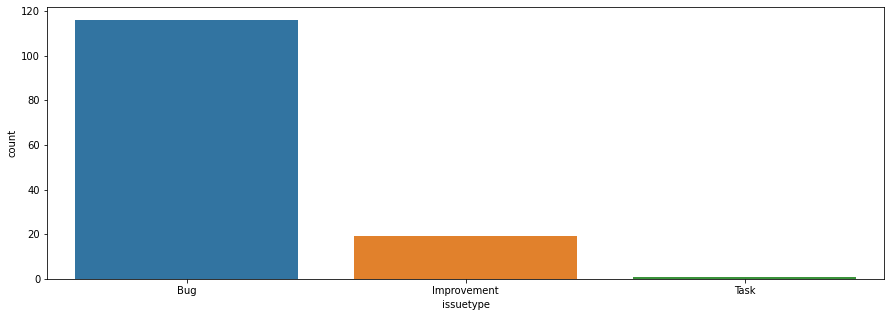

In [203]:
sns.countplot(pre_release_after_tagging.issuetype)

### Software quality metrics merging

In [204]:
pre_release_after_tagging_per_version = pre_release_after_tagging[pre_release_after_tagging.issuetype=="Bug"].groupby("version_name").issue_id.count().reset_index()

In [205]:
pre_bug_per_version = pre_release[pre_release.issuetype=="Bug"].groupby("version_name").issue_id.count().reset_index()

In [206]:
post_bug_per_version = post_release.groupby("version_name").issue_id.count().reset_index()

In [207]:
sw_quality_metrics = post_bug_per_version.merge(pre_bug_per_version, how="outer", on="version_name")
sw_quality_metrics = sw_quality_metrics.merge(pre_release_after_tagging_per_version, how="outer", on="version_name")
sw_quality_metrics.rename(columns={"issue_id_x":"post_release_bugs",
                                     "issue_id_y":"pre_release_bugs",
                                  "issue_id":"pre_release_after_tagging_bugs"}, inplace=True)
sw_quality_metrics = sw_quality_metrics.fillna(0)
sw_quality_metrics["dde"] = sw_quality_metrics.pre_release_bugs / (sw_quality_metrics.post_release_bugs + sw_quality_metrics.pre_release_bugs)
sw_quality_metrics

,version_name,post_release_bugs,pre_release_bugs,pre_release_after_tagging_bugs,dde
0,4.5.7,1,0.0,0.0,0.000000
1,5.1,30,2.0,5.0,0.062500
2,5.1.1,7,0.0,0.0,0.000000
3,5.1.2,11,0.0,0.0,0.000000
4,5.2,56,5.0,13.0,0.081967
5,5.3,23,3.0,3.0,0.115385
6,5.4,21,12.0,9.0,0.363636
7,5.5,11,2.0,4.0,0.153846
8,5.6,46,2.0,2.0,0.041667
9,5.6.1,12,0.0,0.0,0.000000
